In [17]:
from __future__ import print_function
import numpy as np
import argparse
import cv2

def adjust_gamma(image, gamma):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
        
    b, g, r = cv2.split(image)   # img파일을 b,g,r로 분리
    
    b2 = cv2.LUT(b, table)
    g2 = cv2.LUT(g, table)
    r2 = cv2.LUT(r, table)
    
    return cv2.merge([b2,g2,r2]) # b, r을 바꿔서 Merge
    
#     color = ('b','g','r')
#     for c,color in enumerate(color):    
#         for i in range(m):
#             for j in range(n):
#                 r[i, j,c]= 255 * pow(image[i,j,0] / 255, invGamma)
    
#     r = [255 * pow(image[i,i,0] / 255, invGamma) for i in np.arrange(0,256)]
#     g = 255 * pow(g / 255, invGamma)
#     b = 255 * pow(b / 255, invGamma)    
    
#     image2 = image
    
#     image2[:,:,0] = cv2.LUT(image[:,:,0], table)
#     image2[:,:,1] = cv2.LUT(image[:,:,1], table)
#     image2[:,:,2] = cv2.LUT(image[:,:,2], table)
#     # apply gamma correction using the lookup table
#     return image2

    # apply gamma correction using the lookup table
#     return cv2.LUT(image, table)

In [10]:
help(cv2.LUT)

Help on built-in function LUT:

LUT(...)
    LUT(src, lut[, dst]) -> dst



In [9]:
color = ('b','g','r')
for i,col in enumerate(color):
    print (i, col)

0 b
1 g
2 r


In [7]:
help(pow)

Help on built-in function pow in module __builtin__:

pow(...)
    pow(x, y[, z]) -> number
    
    With two arguments, equivalent to x**y.  With three arguments,
    equivalent to (x**y) % z, but may be more efficient (e.g. for longs).



In [4]:
# 실제 아래와 같이 argument 전달로 외부 실행 방식으로도 처리 가능함.
# python adjust_gamma.py --image example_01.png

# # construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True,
#     help="path to input image")
# args = vars(ap.parse_args())
 
# # load the original image
# original = cv2.imread(args["image"])

In [29]:
# original = cv2.imread('InsideOfCathedral.bmp')
# original.shape

# adjusted=original[:,:,2]

# cv2.imshow("Images", adjusted)
# cv2.waitKey(0)
# cv2.destroyAllWindows() 

In [19]:
# original = cv2.imread('InsideOfCathedral.bmp')
original = cv2.imread('OutsideView.bmp')

# loop over various values of gamma
for gamma in [0.45, 1.15, 1.25, 2.2]:
    # ignore when gamma is 1 (there will be no change to the image)
#     if gamma == 1:
#         continue

    # apply gamma correction and show the images
    gamma = gamma if gamma > 0 else 0.1
    
    adjusted = adjust_gamma(original, gamma=gamma)
    cv2.putText(adjusted, "g={}".format(gamma), (10, 30),
        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 3)
    cv2.imshow("Images", np.hstack([original, adjusted]))
    cv2.waitKey(0)
    cv2.destroyAllWindows()    

In [6]:
original.shape

(683, 512, 3)

In [85]:
table.shape

(256,)

In [10]:
help(cv2.imread)

Help on built-in function imread:

imread(...)
    imread(filename[, flags]) -> retval



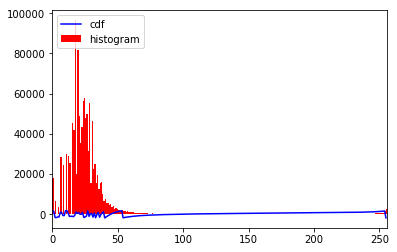

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('InsideOfCathedral.bmp',1)

hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
# print (cdf.max())
cdf_normalized = cdf * hist.max()/ cdf.max()
# print (cdf_normalized.max())

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [2]:
img = cv2.imread('InsideOfCathedral.bmp',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imwrite('res.png',res)

True

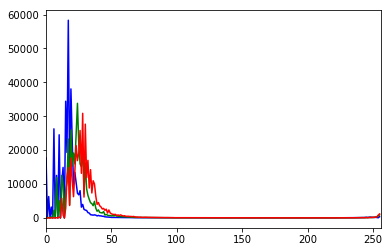

In [3]:
# import cv2
# import numpy as np
# from matplotlib import pyplot as plt
img = cv2.imread('InsideOfCathedral.bmp')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])

plt.show()

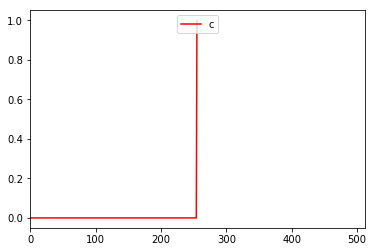

In [4]:
plt.plot(cdf/(img.size), color = 'r')
# plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,512])
plt.legend(('cdf'), loc = 'upper center')
plt.show()

In [5]:
print(img.shape)
print(img.flatten().shape)
print(768*512)
print(img.size)
# help(cv2.imread)
cv2.IMREAD_COLOR
cv2.IMREAD_GRAYSCALE
cv2.IMREAD_UNCHANGED
# dir(cv2)
print(cdf.max())
print(cdf_normalized.shape)
print(cdf.shape)
print(cdf_normalized.max())
print(hist.shape)
print(bins.shape)

(768, 512, 3)
(1179648,)
393216
1179648
1179648
(256,)
(256,)
1804
(256,)
(257,)


In [27]:
import numpy as np 

def imhist(im):
  # calculates normalized histogram of an image
	m, n = im.shape
	h = [0.0] * 256 #256 길이의 리스트를 만들어준다.. 
	for i in range(m):
		for j in range(n):
			h[im[i, j]]+=1 #해당 픽셀의 Intensitiy 값이 0~255 사이일 때 해당 Intensity 자리에 1씩 증가 시켜줌..
	return np.array(h)/(m*n) #정규화.. 전체 화소수로 나눔..

def cumsum(h):
	# finds cumulative sum of a numpy array, list
	return [sum(h[:i+1]) for i in range(len(h))] # h의 길이 만큼 즉, 0~255까지의 각 인덱스 위치에서 그 인덱스 이전까지의 합의 리스트 구함..

def histeq(im):
	#calculate Histogram
	h = imhist(im)
	cdf = np.array(cumsum(h)) #cumulative distribution function
	sk = np.uint8(255 * cdf) #finding transfer function values
	s1, s2 = im.shape
	Y = np.zeros_like(im)
	# applying transfered values for each pixels
	for i in range(0, s1):
		for j in range(0, s2):
			Y[i, j] = sk[im[i, j]]
	H = imhist(Y)
	#return transformed image, original and new istogram, 
	# and transform function
	return Y , h, H, sk, cdf

def histeq_only_img(im):
	#calculate Histogram
	h = imhist(im)
	cdf = np.array(cumsum(h)) #cumulative distribution function
	sk = np.uint8(255 * cdf) #finding transfer function values
	s1, s2 = im.shape
	Y = np.zeros_like(im)
	# applying transfered values for each pixels
	for i in range(0, s1):
		for j in range(0, s2):
			Y[i, j] = sk[im[i, j]]
	H = imhist(Y)
	#return transformed image, original and new istogram, 
	# and transform function
	return Y

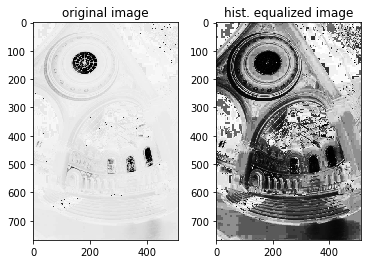

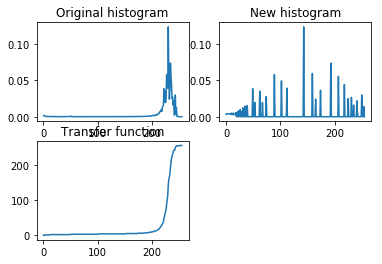

In [10]:
import pylab as plt
import matplotlib.image as mpimg
import numpy as np
# load image to numpy arrayb
# matplotlib 1.3.1 only supports png images
# use scipy or PIL for other formats
img = np.uint8(mpimg.imread('InsideOfCathedral.bmp')*255.0)
# convert to grayscale
# do for individual channels R, G, B, A for nongrayscale images

img = np.uint8((0.2126* img[:,:,0]) + \
        np.uint8(0.7152 * img[:,:,1]) +\
             np.uint8(0.0722 * img[:,:,2]))

# use hist module from hist.py to perform histogram equalization
from hist import histeq
new_img, h, new_h, sk = histeq(img)

# show old and new image
# show original image
plt.subplot(121)
plt.imshow(img)
plt.title('original image')
plt.set_cmap('gray')
# show original image
plt.subplot(122)
plt.imshow(new_img)
plt.title('hist. equalized image')
plt.set_cmap('gray')
plt.show()

# plot histograms and transfer function
fig = plt.figure()
fig.add_subplot(221)
plt.plot(h)
plt.title('Original histogram') # original histogram

fig.add_subplot(222)
plt.plot(new_h)
plt.title('New histogram') #hist of eqlauized image

fig.add_subplot(223)
plt.plot(sk)
plt.title('Transfer function') #transfer function

plt.show()

[[10 10 10 ..., 18 20 23]
 [10 10 10 ..., 19 20 22]
 [ 8  8  8 ..., 21 19 20]
 ..., 
 [10 10 10 ..., 18 17 17]
 [10 10 10 ..., 18 17 17]
 [10 10 10 ..., 18 17 17]]
(array([[10, 10, 10, ..., 18, 20, 23],
       [10, 10, 10, ..., 19, 20, 22],
       [ 8,  8,  8, ..., 21, 19, 20],
       ..., 
       [10, 10, 10, ..., 18, 17, 17],
       [10, 10, 10, ..., 18, 17, 17],
       [10, 10, 10, ..., 18, 17, 17]], dtype=uint8), array([[16, 16, 16, ..., 19, 22, 24],
       [15, 15, 15, ..., 20, 21, 23],
       [15, 15, 15, ..., 22, 21, 21],
       ..., 
       [13, 13, 13, ..., 25, 24, 24],
       [13, 13, 13, ..., 25, 24, 24],
       [13, 13, 13, ..., 25, 24, 24]], dtype=uint8), array([[17, 17, 17, ..., 23, 26, 28],
       [17, 17, 17, ..., 25, 25, 27],
       [17, 17, 17, ..., 26, 25, 25],
       ..., 
       [19, 19, 19, ..., 28, 28, 28],
       [19, 19, 19, ..., 28, 28, 28],
       [19, 19, 19, ..., 28, 28, 28]], dtype=uint8))
(3, 768, 512)
(768, 512, 3)


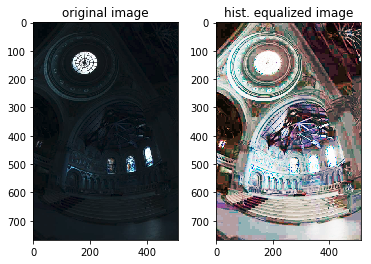

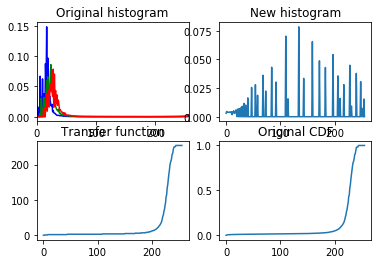

In [39]:
# import pylab as plt
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
# load image to numpy arrayb
# matplotlib 1.3.1 only supports png images
# use scipy or PIL for other formats
# img = np.uint8(mpimg.imread('InsideOfCathedral.bmp')*255.0)
img = cv2.imread('InsideOfCathedral.bmp', cv2.IMREAD_COLOR)
# convert to grayscale
# do for individual channels R, G, B, A for nongrayscale images

# img2 = np.uint8(img[:,:,0])

# use hist module from hist.py to perform histogram equalization
# from hist import histeq

b, g, r = cv2.split(img)   # img파일을 b,g,r로 분리
print(b)
color = ('b','g','r')
im = (b,g,r)
print(im)
new_im = np.array([b,g,r])
print (new_im.shape)
# np.array([[1,2,3],[4,5,6],[7,8,9]])

for i,col in enumerate(color):
    new_im[i] = histeq_only_img(im[i])

img2 = cv2.merge(new_im) # b, r을 바꿔서 Merge
print (img2.shape)

# show old and new image
# show original image
plt.subplot(121)
plt.imshow(img)
plt.title('original image')
# plt.set_cmap('Reds')
# show original image
plt.subplot(122)
plt.imshow(img2)
plt.title('hist. equalized image')
# plt.set_cmap('gray')
plt.show()

# b, g, r = cv2.split(img)   # img파일을 b,g,r로 분리

fig = plt.figure()
fig.add_subplot(221)
color = ('b','g','r')
im = (b,g,r)

for i,col in enumerate(color):
    histr = imhist(np.uint8(im[i]))
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Original histogram') # original histogram

fig.add_subplot(222)
plt.plot(new_h)
plt.title('New histogram') #hist of eqlauized image

fig.add_subplot(223)
plt.plot(sk)
plt.title('Transfer function') #transfer function

fig.add_subplot(224)
plt.plot(cdf)
plt.title('Original CDF') #transfer function

plt.show()

In [22]:
help(plt.title)

Help on function title in module matplotlib.pyplot:

title(s, *args, **kwargs)
    Set a title of the current axes.
    
    Set one of the three available axes titles. The available titles are
    positioned above the axes in the center, flush with the left edge,
    and flush with the right edge.
    
    .. seealso::
        See :func:`~matplotlib.pyplot.text` for adding text
        to the current axes
    
    Parameters
    ----------
    label : str
        Text to use for the title
    
    fontdict : dict
        A dictionary controlling the appearance of the title text,
        the default `fontdict` is:
    
            {'fontsize': rcParams['axes.titlesize'],
            'fontweight' : rcParams['axes.titleweight'],
            'verticalalignment': 'baseline',
            'horizontalalignment': loc}
    
    loc : {'center', 'left', 'right'}, str, optional
        Which title to set, defaults to 'center'
    
    Returns
    -------
    text : :class:`~matplotlib.text.Text`


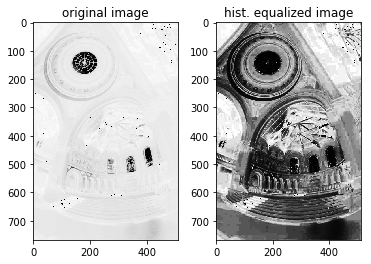

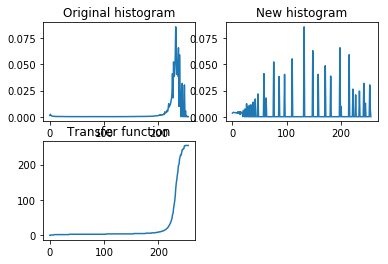

In [13]:
import pylab as plt
import matplotlib.image as mpimg
import numpy as np
# load image to numpy arrayb
# matplotlib 1.3.1 only supports png images
# use scipy or PIL for other formats
img = np.uint8(mpimg.imread('InsideOfCathedral.bmp')*255.0)
# convert to grayscale
# do for individual channels R, G, B, A for nongrayscale images

img = np.uint8(img[:,:,1])

# use hist module from hist.py to perform histogram equalization
from hist import histeq
new_img, h, new_h, sk = histeq(img)

# show old and new image
# show original image
plt.subplot(121)
plt.imshow(img)
plt.title('original image')
plt.set_cmap('gray')
# show original image
plt.subplot(122)
plt.imshow(new_img)
plt.title('hist. equalized image')
plt.set_cmap('gray')
plt.show()

# plot histograms and transfer function
fig = plt.figure()
fig.add_subplot(221)
plt.plot(h)
plt.title('Original histogram') # original histogram

fig.add_subplot(222)
plt.plot(new_h)
plt.title('New histogram') #hist of eqlauized image

fig.add_subplot(223)
plt.plot(sk)
plt.title('Transfer function') #transfer function

plt.show()

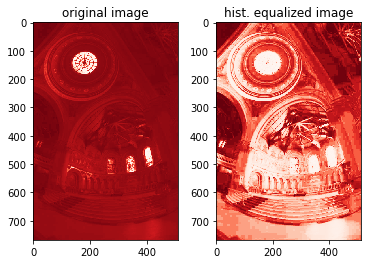

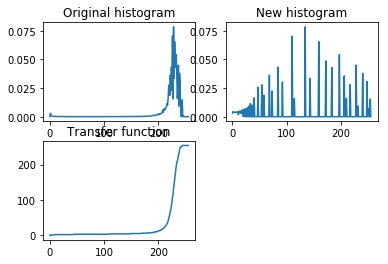

In [27]:
import pylab as plt
import matplotlib.image as mpimg
import numpy as np
# load image to numpy arrayb
# matplotlib 1.3.1 only supports png images
# use scipy or PIL for other formats
img = np.uint8(mpimg.imread('InsideOfCathedral.bmp')*255.0)
# convert to grayscale
# do for individual channels R, G, B, A for nongrayscale images

img = np.uint8(img[:,:,0])

# use hist module from hist.py to perform histogram equalization
from hist import histeq
new_img, h, new_h, sk = histeq(img)

# show old and new image
# show original image
plt.subplot(121)
plt.imshow(img)
plt.title('original image')
plt.set_cmap('Reds')
# show original image
plt.subplot(122)
plt.imshow(new_img)
plt.title('hist. equalized image')
plt.set_cmap('Reds')
plt.show()

# plot histograms and transfer function
fig = plt.figure()
fig.add_subplot(221)
plt.plot(h)
plt.title('Original histogram') # original histogram

fig.add_subplot(222)
plt.plot(new_h)
plt.title('New histogram') #hist of eqlauized image

fig.add_subplot(223)
plt.plot(sk)
plt.title('Transfer function') #transfer function

plt.show()

In [20]:
import matplotlib as mplib
# help(mplib.colors.Colormap)
help(plt.set_cmap)

Help on function set_cmap in module matplotlib.pyplot:

set_cmap(cmap)
    Set the default colormap.  Applies to the current image if any.
    See help(colormaps) for more information.
    
    *cmap* must be a :class:`~matplotlib.colors.Colormap` instance, or
    the name of a registered colormap.
    
    See :func:`matplotlib.cm.register_cmap` and
    :func:`matplotlib.cm.get_cmap`.

